## Part 3: Party Platform Analysis
* Party Platforms are created with the intent to inform and persuade people to register/follow their party. 
    * The audience is the most general of the other examples in this project. 
* Like the other analyses, this will consider the top features and significant word choice of the platforms.

In [1]:
import pandas as pd
import nltk
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns        # seaborn graphical package
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [2]:
platform = pd.read_csv('/Users/emmatarcson/Documents/data_science/RhetoricalFactor-analysis/data2/platformsents.csv')
platform[['Aff','sentences']]

,Aff,sentences
0,R,We dedicate this platform with admiration and ...
1,R,"Preamble\nWith this platform, we the Republica..."
2,R,We believe in American exceptionalism.
3,R,We believe the United States of America is unl...
4,R,We believe America is exceptional because of o...
...,...,...
3103,D,Democrats will continue to stand against incit...
3104,D,We oppose settlement expansion.
3105,D,We believe that while Jerusalem is a matter fo...
3106,D,Democrats will restore U.S.-Palestinian diplom...


Will have to strip 'Democrat' and 'Republican' from the sentences...

In [3]:
banned = ['Republican', 'Democrat', 'Republicans', 'Democrats']
f = lambda x: ' '.join([item for item in x.split() if item not in banned])
platform["sentences2"] = platform["sentences"].apply(f)

In [4]:
platform

,Unnamed: 0,Speakers,Aff,sentences,sentences2
0,0,Republican Party Platform,R,We dedicate this platform with admiration and ...,We dedicate this platform with admiration and ...
1,1,Republican Party Platform,R,"Preamble\nWith this platform, we the Republica...","Preamble With this platform, we the Party reaf..."
2,2,Republican Party Platform,R,We believe in American exceptionalism.,We believe in American exceptionalism.
3,3,Republican Party Platform,R,We believe the United States of America is unl...,We believe the United States of America is unl...
4,4,Republican Party Platform,R,We believe America is exceptional because of o...,We believe America is exceptional because of o...
...,...,...,...,...,...
3103,1522,Democratic Party Platform,D,Democrats will continue to stand against incit...,will continue to stand against incitement and ...
3104,1523,Democratic Party Platform,D,We oppose settlement expansion.,We oppose settlement expansion.
3105,1524,Democratic Party Platform,D,We believe that while Jerusalem is a matter fo...,We believe that while Jerusalem is a matter fo...
3106,1525,Democratic Party Platform,D,Democrats will restore U.S.-Palestinian diplom...,will restore U.S.-Palestinian diplomatic ties ...


In [5]:
platform.Aff.value_counts() #that's not too bad

R    1581
D    1527
Name: Aff, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(platform['sentences2'], platform['Aff'], random_state=0,
                                  train_size=0.6) 

vectorizer = TfidfVectorizer(min_df=1, max_features=4000, stop_words='english')

X_text_train = vectorizer.fit_transform(X_train)
X_text_test = vectorizer.transform(X_test)

from sklearn.svm import SVC 
svcmodel = SVC(kernel='linear', C=1E5)  
svcmodel.fit(X_text_train, y_train)
pred = svcmodel.predict(X_text_test)
accuracy_score(y_test, pred)

0.8070739549839229

/Users/emmatarcson/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=['D', 'R'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


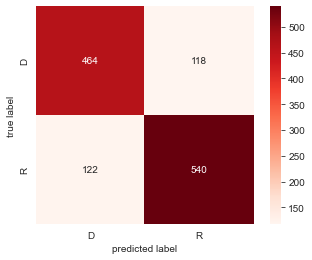

In [7]:
from sklearn.metrics import confusion_matrix
labels = ['D','R']
mat = confusion_matrix(y_test, pred, labels)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap="Reds",
           xticklabels=labels, yticklabels=labels)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

The party platform most likely includes a lot of straight forward words that become important for classifying between the two parties. 

In [35]:
# i'm adding a random neutral row, because that'll let me see features...

In [36]:
neutral = pd.DataFrame({'Aff' : 'None', 'sentences2': 'Yo'}, index=[1])
platform2 = platform[['Aff', 'sentences2']]
platform2 = pd.concat([platform2, neutral])
platform2.tail()

,Aff,sentences2
3104,D,We oppose settlement expansion.
3105,D,We believe that while Jerusalem is a matter fo...
3106,D,will restore U.S.-Palestinian diplomatic ties ...
3107,D,We oppose any effort to unfairly single out an...
1,None,Yo


In [37]:
X_train, X_test, y_train, y_test = train_test_split(platform2['sentences2'], platform2['Aff'], random_state=0,
                                  train_size=0.6)
nbmodel = MultinomialNB()
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2,max_features=1500, stop_words='english') #using this to find vocab
X_text_train = vectorizer.fit_transform(X_train)
X_text_test = vectorizer.transform(X_test)


nbmodel.fit(X_text_train, y_train)
pred = nbmodel.predict(X_text_test)
accuracy_score(y_test, pred)

0.795016077170418

In [38]:
nbmodel.classes_

array(['D', 'None', 'R'], dtype='<U4')

In [40]:
def print_top(vectorizer, clf, class_labels, n):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top = np.argsort(clf.coef_[i])[0-n:]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j].replace(' ', '-') for j in top)))
    

print_top(vectorizer, nbmodel, nbmodel.classes_, 60)

D: efforts, security, color, justice, new, community, clean, disabilities, income, energy, jobs, economic, school, funding, women, country, expand, families, end, education, 19, covid, climate, economy, president, global, housing, protect, act, help, affordable, make, increase, america, programs, schools, administration, students, united, pandemic, use, communities, access, states, rights, work, world, federal, public, ensure, americans, workers, trump, care, including, people, support, believe, american, health
None: example, fear, favored, faster, farmworkers, farms, farmers, farm, far, family, families, fda, employers, evidence, europe, ensure, enormous, enhance, english, engage, enforcing, enforcement, enforce, energy, ending, ended, endangered, end, encourage, enacting, enacted, enact, enable, empower, ensures, ensuring, enter, enterprise, ethnic, established, establish, essential, especially, erosion, era, equity, equitable, european, equipment, equality, equal, epa, environmenta

There's the features:

D: efforts, security, color, justice, new, community, clean, disabilities, income, energy, jobs, economic, school, funding, women, country, expand, families, end, education, 19, covid, climate, economy, president, global, housing, protect, act, help, affordable, make, increase, america, programs, schools, administration, students, united, pandemic, use, communities, access, states, rights, work, world, federal, public, ensure, americans, workers, trump, care, including, people, support, believe, american, health

R: life, internet, business, families, approach, defense, control, legislation, best, laws, power, years, citizens, encourage, free, policies, act, based, care, constitution, foreign, constitutional, education, nation, new, security, amendment, economy, growth, human, party, military, right, urge, religious, private, americans, freedom, economic, united, world, tax, public, law, national, president, administration, state, current, oppose, rights, support, america, country, people, states, congress, american, federal, government

* wait now that I'm looking at this... there are definitely some words that I'd say are categorical into a certain viewpoint

In [26]:
#import re
#trans_toks = [nltk.word_tokenize(re.sub(r'[^\w+ ]', '', t.lower())) for t in platform['sentences']]
#trans_tok_lens = [len(t) for t in trans_toks]
#trans_type_lens = [len(set(t)) for t in trans_toks]
#TTR = [len(set(t))/len(t) for t in trans_toks]
#platform['Sent_len'] = trans_tok_lens
#platform['Type_count'] = trans_type_lens
#conv_speeches['TTR'] = TTR
#platform.head()

,Unnamed: 0,Speakers,Aff,sentences,Sent_len
0,0,Republican Party Platform,R,We dedicate this platform with admiration and ...,49
1,1,Republican Party Platform,R,"Preamble\nWith this platform, we the Republica...",17
2,2,Republican Party Platform,R,We believe in American exceptionalism.,5
3,3,Republican Party Platform,R,We believe the United States of America is unl...,14
4,4,Republican Party Platform,R,We believe America is exceptional because of o...,27
